In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Read in final dataset from 03_exploratory_data_analysis

In [4]:
# 32k final combined dataset with 50/50 split of hit and non-hit songs
data = pd.read_csv('../data/final/modeling_dataset_32k.csv')

In [5]:
data_numeric = data.drop(['song', 'artist', 'song_artist'], axis=1)

# 10. Classification Modeling

### Objective: Predict whether a given song is a hit song based exclusively on audio features and release year

In [6]:
# Split data into features (X) and labels (y)
X = data_numeric.drop('hit_song', axis=1)
y = data_numeric['hit_song']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression model 

### 1) Logistic Regression model initiation and training using all features in dataset

In [9]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

### 2) Extract the coefficients of the features
#### *Identify the features with the most significant relationship with the likelihood of a song being a hit or non-hit.*

In [10]:
# Extracting the coefficients
coefficients = model_lr.coef_[0]
features = X.columns

In [11]:
# Create a DataFrame to display feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the coefficients for better visualization
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_abs = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
coef_df_abs

,Feature,Coefficient,Absolute_Coefficient
7,instrumentalness,-1.191185,1.191185
3,loudness,0.794711,0.794711
1,energy,-0.541084,0.541084
6,acousticness,-0.449552,0.449552
0,danceability,0.376121,0.376121
13,year,-0.211335,0.211335
5,speechiness,-0.195780,0.195780
9,valence,0.137653,0.137653
4,mode,0.102678,0.102678
12,time_signature,0.088233,0.088233


### 3) Make prediction using the Logistic Regression model trained with all features

In [12]:
y_pred_lr = model_lr.predict(X_test_scaled)

In [13]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.7274126519932277

In [14]:
class_report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
pd.DataFrame(class_report_lr).transpose()

,precision,recall,f1-score,support
0,0.799507,0.602663,0.687268,3229.000000
1,0.684223,0.850673,0.758423,3268.000000
accuracy,0.727413,0.727413,0.727413,0.727413
macro avg,0.741865,0.726668,0.722846,6497.000000
weighted avg,0.741519,0.727413,0.723059,6497.000000


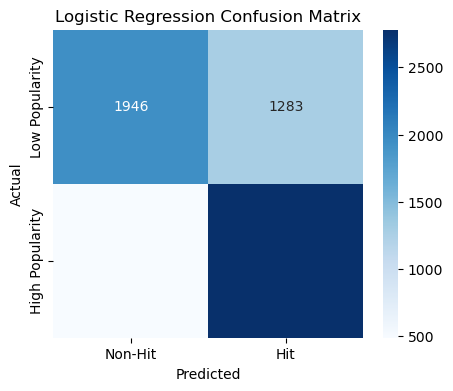

In [15]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hit', 'Hit'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4) Train another Logistic Regression model with the top 5 features and make prediction

In [16]:
features_to_use = ['instrumentalness', 'loudness', 'energy', 'acousticness', 'danceability']
X_5f = data_numeric[features_to_use]
y_5f = data_numeric['hit_song']
X_train_5f, X_test_5f, y_train_5f, y_test_5f = train_test_split(X_5f, y_5f, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_5f = scaler.fit_transform(X_train_5f)
X_test_5f = scaler.transform(X_test_5f)

In [18]:
model_lr_5f = LogisticRegression()
model_lr_5f.fit(X_train_5f, y_train_5f)

LogisticRegression()

In [19]:
y_pred_5f = model_lr.predict(X_test_scaled)

In [20]:
# Evaluate the model
accuracy_lr_5f = accuracy_score(y_test_5f, y_pred_5f)
accuracy_lr_5f

0.7274126519932277

In [21]:
class_report_lr_5f = classification_report(y_test_5f, y_pred_5f, output_dict=True)
pd.DataFrame(class_report_lr_5f).transpose()

,precision,recall,f1-score,support
0,0.799507,0.602663,0.687268,3229.000000
1,0.684223,0.850673,0.758423,3268.000000
accuracy,0.727413,0.727413,0.727413,0.727413
macro avg,0.741865,0.726668,0.722846,6497.000000
weighted avg,0.741519,0.727413,0.723059,6497.000000


## Random Forest Classifier model 

### 1) Random Forest Classifier model initiation and training

In [22]:
# Initialize and train the RandomForestClassifier with all features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make prediction
y_pred_rf = rf_model.predict(X_test_scaled)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.7715868862551947

In [25]:
class_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
pd.DataFrame(class_report_rf).transpose()

,precision,recall,f1-score,support
0,0.822313,0.689378,0.750000,3229.000000
1,0.735356,0.852815,0.789742,3268.000000
accuracy,0.771587,0.771587,0.771587,0.771587
macro avg,0.778834,0.771096,0.769871,6497.000000
weighted avg,0.778573,0.771587,0.769990,6497.000000


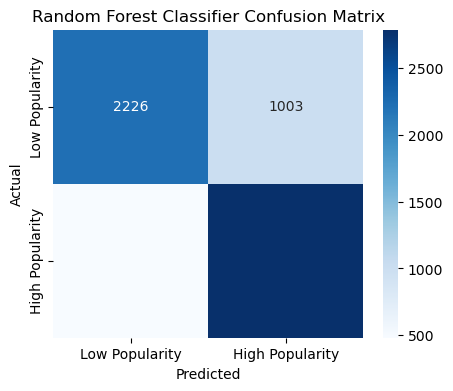

In [26]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 2) Feature importance in this RandomForestClassifier model

In [27]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
7   instrumentalness    0.173489
6       acousticness    0.109536
1             energy    0.093730
3           loudness    0.090953
11       duration_ms    0.084662
0       danceability    0.083874
9            valence    0.071461
5        speechiness    0.067860
8           liveness    0.059163
10             tempo    0.058980
13              year    0.058103
2                key    0.032686
4               mode    0.008586
12    time_signature    0.006918


### 3) Hyperparameter Tuning the Random Forest Classifier
#### *Use Randomized Search Cross-Validation to identify the best hyperparameter values for the Random Forest classifier.*

In [28]:
# Fine-tune the Random Forest model using Randomized Search to improve its accuracy
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid to sample from during fitting
param_distributions = {'n_estimators': np.arange(100, 1001, 100), 
    'max_depth': [None] + list(np.arange(5, 51, 5)),  
    'min_samples_split': np.arange(2, 11, 1),  
    'min_samples_leaf': np.arange(1, 11, 1),  
    'max_features': ['auto', 'sqrt'], 
    'bootstrap': [True, False]}  

In [29]:
# Initialize another RandomForestClassifier
rf_model_tuned = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model_tuned, param_distributions=param_distributions, n_iter=8,
    cv=3, verbose=2, random_state=42, n_jobs=-1)

In [30]:
# Start Timing
import time
start_time = time.time()

In [31]:
# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Linds\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Linds\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Linds\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Linds\anaconda3\lib\site-packages\

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   random_state=42, verbose=2)

In [ ]:
# End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for RandomizedSearchCV fitting: {elapsed_time} seconds")

In [ ]:
# Get the best parameters from the randomized search
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

In [ ]:
# Use the best model from randomized search
best_rf_model = random_search.best_estimator_
best_y_pred_rf = best_rf_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy_rf_best = accuracy_score(y_test, best_y_pred_rf)
accuracy_rf_best

In [ ]:
class_report_rf_best = classification_report(y_test, best_y_pred_rf, output_dict=True)
pd.DataFrame(class_report_rf_best).transpose()

## K-Nearest Neighbors Classifier model

In [ ]:
# Initialize and train the KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred_kn = knn_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy_kn = accuracy_score(y_test, y_pred_kn)
accuracy_kn

In [ ]:
class_report_kn = classification_report(y_test, y_pred_kn, output_dict=True)
pd.DataFrame(class_report_kn).transpose()

In [ ]:
conf_matrix_kn = confusion_matrix(y_test, y_pred_kn)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_kn, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('KNeighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGBoost Classifier model

### 1) XGBoost Classifier model initiation and training

In [ ]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_scaled, y_train)

In [ ]:
# Prediction
y_pred_xgb = xgb_clf.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

In [ ]:
class_report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
pd.DataFrame(class_report_xgb).transpose()

In [ ]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 2) Hyperparameter Tuning the XGBoost Classifier

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {'n_estimators': np.arange(50, 300, 50),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': np.arange(3, 10, 2),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]}

In [ ]:
# Initialize the XGBoost classifier
xgb_clf_tuned = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Initialize RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=8, cv=3, verbose=1, n_jobs=-1, random_state=42)

In [ ]:
# Start timing
start_time = time.time()

In [ ]:
# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

In [ ]:
# End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for RandomizedSearchCV fitting with XGBoost: {elapsed_time} seconds")

In [ ]:
# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

In [ ]:
# Predict using the best estimator
best_xgb_clf = random_search.best_estimator_
y_pred_xgb_best = best_xgb_clf.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
accuracy_xgb_best

In [ ]:
class_report_xgb_best = classification_report(y_test, y_pred_xgb_best, output_dict=True)
pd.DataFrame(class_report_xgb_best).transpose()

### 3) Check the feature importance of the hyperparameter tuned XGBoost Classifier

In [ ]:
# Check feature importance
importances = best_xgb_clf.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)